# Make Summary Tables 

In [74]:
# imports
from functions import *

import matplotlib as mpl
import matplotlib.dates as dates
import locale

### INPUTS

In [92]:
loc_dict

{'Rolla': [19.56,
  'vichy_rolla_national_airport_mo_us',
  'Physics building Rolla',
  '37.9549',
  '-91.7722',
  '112871',
  '41925',
  '20',
  '--'],
 'MAC': [20.4,
  'farmington_regional_airport_mo_us',
  'Mineral Area College',
  '37.845291',
  '-90.482322',
  '156041',
  '65512',
  '11',
  'rooftop'],
 'SEMO': [18.96,
  'cape_girardeau_municipal_airport_mo_us',
  'Cape Girardeau, MO Rhodes Hall',
  '37.316192',
  '-89.529771',
  '129606',
  '71591',
  '10',
  '--'],
 'Timberlane': [20.95,
  'midwest_national_air_center_airport_mo_us',
  'Timberlane Obervatory',
  '39.4128',
  '-94.2417',
  '421127',
  '43213',
  '11',
  '--'],
 'Ozark': [20.06,
  'springfield_weather_service_office_airport_mo_us',
  'Ozark City Hall',
  '37.021196',
  '-93.205458',
  '474329',
  '129921',
  '30',
  '--'],
 'Ozark_II': [20.06,
  'springfield_weather_service_office_airport_mo_us',
  'Ozark Community Center',
  '37.022',
  '-93.221',
  '473062',
  '143671',
  '29',
  'rooftop'],
 'Perryville': [20.4

In [121]:
""" 
List the location names (see SUMMARIES for a list of options)
"""

my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 
           'Perryville', 'Overland', 'Hillsboro', 'Science Center', 
           'Magruder Hall', 'MG Hall', 'TSO', 'Thousand_Hills', 'Grand Gulf', 
           'echo bluff', 'Jefferson Arch', 'Broemmelsiek Park']



# my_locs = ['Grand Gulf']


""" 
Indicate the date range you would like to process

write None if you would like to process all available data
""" 

# start_date_str = '2020-12-23'
# end_date_str = '2021-02-22'

start_date_str = None
end_date_str = None

### INTRO TABLE

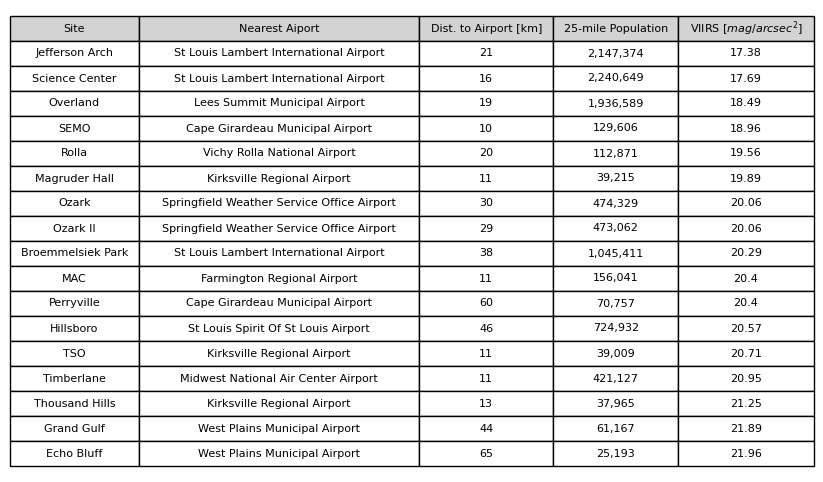

In [122]:
data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline


high_conf = True



# Define columns
columns = [
    'Site', 
    'Nearest Aiport',
    'Dist. to Airport [km]',
    '25-mile Population',
    r'VIIRS [$mag/arcsec^2$]'
    ]

# Create an empty DataFrame
intro_df = pd.DataFrame(columns=columns)

for location in my_locs:  
  
    # Filter only CSV files containing the desired location in their filename
    location_for_dir = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_for_dir in file]


    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)

        
        df = pd.read_csv(df_path, low_memory=False)

        # format site appropriately
        site_str = location.replace('_',' ').split()
        capitalized_site = []

        for word in site_str:
            if len(word) > 0:
                capitalized_word = word[0].upper() + word[1:]
                capitalized_site.append(capitalized_word)
                capitalized_site_str = ' '.join(capitalized_site)


        # format population
        # Set the locale to the system default
        locale.setlocale(locale.LC_ALL, '')
        formatted_pop = locale.format_string("%d", int(loc_dict[location][5]), grouping=True)

        new_data = {
            'Site': capitalized_site_str,
            'Nearest Aiport': loc_dict[location][1].replace("_"," ").title().replace(' Mo Us', ''),
            'Dist. to Airport [km]': loc_dict[location][7],
            '25-mile Population': formatted_pop, 
            r'VIIRS [$mag/arcsec^2$]': loc_dict[location][0]
            
            }
                        

        row_index = len(df)  # Assuming you want to add the new row at the end of the DataFrame
        intro_df.loc[row_index] = new_data
        

# Round the values to two decimal points
intro_df = intro_df.round(3)
# Sort DataFrame by VIIRS value
intro_df = intro_df.sort_values(by=r'VIIRS [$mag/arcsec^2$]', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=intro_df.values, colLabels=intro_df.columns, loc='center', cellLoc='center', colColours=['lightgray']*len(intro_df.columns))

table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size

# Adjust layout
table.auto_set_column_width(col=list(range(len(intro_df.columns))))  # Auto adjust column width
table.set_fontsize(8)  # Adjust font size
table.scale(1, 1.5)  # Adjust scaling for better readability

save_path = os.path.join("Summary Tables", 'loc_table.png')
# Save as PNG with higher DPI
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
        

### Data Columns and Notes

In [123]:
# import os
# import pandas as pd
# import locale
# import matplotlib.pyplot as plt

# data_tab_directory = "Combined Data Tables"
# files = os.listdir(data_tab_directory)
# %matplotlib inline

# # Define columns
# columns = ['Data', 'Description']

# # Create an empty DataFrame
# desc_df = pd.DataFrame(columns=columns)

# # Data for column 1
# column1_data = [
#     'True Date', 'Time',  'Night Date', 'SQM', 'Cloud Cover',
#     'Astro Dawn', 'Astro Dusk',  'Moon Rise', 'Moon Set',
#     'Moon Peak', 'Moon Peak Altitude', 'Row Classification',
#     'Row Classification Confidence', 'Night Classification',
#     'Night Classification Confidence', 'No SQM Flag', 'Old SQM Flag',
#     'No Weather Flag', 'Old Weather Flag', 'Mult Weather Data Flag'
# ]

# # Data for column 2
# column2_data = [
#     'Local Date', 
#     'Local Time',
#     '''Instead of sorting data by day, we sort it by\n 
#      night. A night starts at 12:00pm and ends at\n 
#     11:59am. The "Night Date" is the date at the\n
#     beginning of this interval''',
#     'Sky brightness measurement in $mag/arcsec^2$',
#     '''Cloud cover as reported by a local airport, 
#     measured in okta''',
#     '''Flag that is only "True" during the 5-minute\n 
#     interval when astronomical dawn occurs''',
#     '''Flag that is only "True" during the 5-minute\n 
#     interval when astronomical dusk occurs''',
#     '''A flag that is only "True" during the 5-minute\n 
#     interval when moon rises above the horizon''',
#     '''A flag that is only "True" during the 5-minute\n 
#     interval when moon sets below the horizon''',
#     '''A flag that is only "True" during the 5-minute\n 
#        interval when moon reaches peak altitude''',
#     'The peak altitude that the moon reaches',
#     'Either "Clear", "Overcast", or neither',
#     '"True" if strict classification criteria are met',
#     'Either "Clear", "Overcast", or neither',
#     '"True" if strict classification criteria are met',
#     '''"True" if no SQM data is available for \n
#     the 5-minute interval''',
#     '''"True" if the SQM data used is associated\n
#     with a previous interval''',
#     '''"True if no weather data is available for\n
#     the 5-minute interval''',
#     '''"True" if the weather data was taken more than\n
#     90 minutes before the 5-minute interval''',
#     '''"True" if multiple cloud cover measurements are\n
#     provided within the 5-minute interval. This indicates\n
#     that the sky conditions were unstable during this time'''
# ]

# # Populate DataFrame
# desc_df['Data'] = column1_data
# desc_df['Description'] = column2_data

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.axis('tight')
# ax.axis('off')

# table = ax.table(cellText=desc_df.values, colLabels=desc_df.columns, loc='center', cellLoc='center', colColours=['lightgray']*len(desc_df.columns))

# table.auto_set_font_size(False)
# table.set_fontsize(8)  # Adjust font size

# # Adjust layout
# table.auto_set_column_width(col=list(range(len(desc_df.columns))))  # Auto adjust column width
# table.set_fontsize(8)  # Adjust font size
# table.scale(1, 1.5)  # Adjust scaling for better readability

# save_path = os.path.join("Summary Tables", 'desc_table.png')
# # Save as PNG with higher DPI
# plt.savefig(save_path, bbox_inches='tight', pad_inches=0.05, dpi=600)
# plt.show()


In [124]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt

# data_tab_directory = "Combined Data Tables"
# files = os.listdir(data_tab_directory)
# %matplotlib inline

# # Define columns
# columns = ['Data', 'Description']

# # Create an empty DataFrame
# summary_df = pd.DataFrame(columns=columns)

# # Data for column 1
# column1_data = [
#     'True Date', 'Time',  'Night Date', 'SQM', 'Cloud Cover',
#     'Astro Dawn', 'Astro Dusk',  'Moon Rise', 'Moon Set',
#     'Moon Peak', 'Moon Peak Altitude', 'Row Classification',
#     'Row Classification Confidence', 'Night Classification',
#     'Night Classification Confidence', 'No SQM Flag', 'Old SQM Flag',
#     'No Weather Flag', 'Old Weather Flag', 'Mult Weather Data Flag'
# ]

# # Data for column 2
# column2_data = [
#     'Local Date', 
#     'Local Time',
#     '''Instead of sorting data by day, we sort it by\n 
#      night. A night starts at 12:00pm and ends at\n 
#     11:59am. The "Night Date" is the date at the\n
#     beginning of this interval''',
#     'Sky brightness measurement in $mag/arcsec^2$',
#     '''Cloud cover as reported by a local airport, 
#     measured in okta''',
#     '''Flag that is only "True" during the 5-minute\n 
#     interval when astronomical dawn occurs''',
#     '''Flag that is only "True" during the 5-minute\n 
#     interval when astronomical dusk occurs''',
#     '''A flag that is only "True" during the 5-minute\n 
#     interval when moon rises above the horizon''',
#     '''A flag that is only "True" during the 5-minute\n 
#     interval when moon sets below the horizon''',
#     '''A flag that is only "True" during the 5-minute\n 
#        interval when moon reaches peak altitude''',
#     'The peak altitude that the moon reaches',
#     'Either "Clear", "Overcast", or neither',
#     '"True" if strict classification criteria are met',
#     'Either "Clear", "Overcast", or neither',
#     '"True" if strict classification criteria are met',
#     '''"True" if no SQM data is available for \n
#     the 5-minute interval''',
#     '''"True" if the SQM data used is associated\n
#     with a previous interval''',
#     '''"True if no weather data is available for\n
#     the 5-minute interval''',
#     '''"True" if the weather data was taken more than\n
#     90 minutes before the 5-minute interval''',
#     '''"True" if multiple cloud cover measurements are\n
#     provided within the 5-minute interval. This indicates\n
#     that the sky conditions were unstable during this time'''
# ]

# # Populate DataFrame
# summary_df['Data'] = column1_data
# summary_df['Description'] = column2_data

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.axis('tight')
# ax.axis('off')

# table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc='center', cellLoc='left', colColours=['lightgray']*len(summary_df.columns))

# table.auto_set_font_size(False)
# table.set_fontsize(8)  # Adjust font size

# # Adjust layout
# table.auto_set_column_width(col=list(range(len(summary_df.columns))))  # Auto adjust column width
# table.set_fontsize(8)  # Adjust font size
# table.scale(1, 1.5)  # Adjust scaling for better readability

# # Adjust row heights for multiline text
# for i in range(len(summary_df)):
#     for j in range(len(summary_df.columns)):
#         cell = table.get_celld()[(i + 1, j)]
#         cell.set_height(0.1)  # Adjust height for multiline text

# save_path = os.path.join("Summary Tables", 'desc_table.png')
# # Save as PNG with higher DPI
# plt.savefig(save_path, bbox_inches='tight', pad_inches=0.5, dpi=600)  # Adjusting vertical padding only
# plt.show()


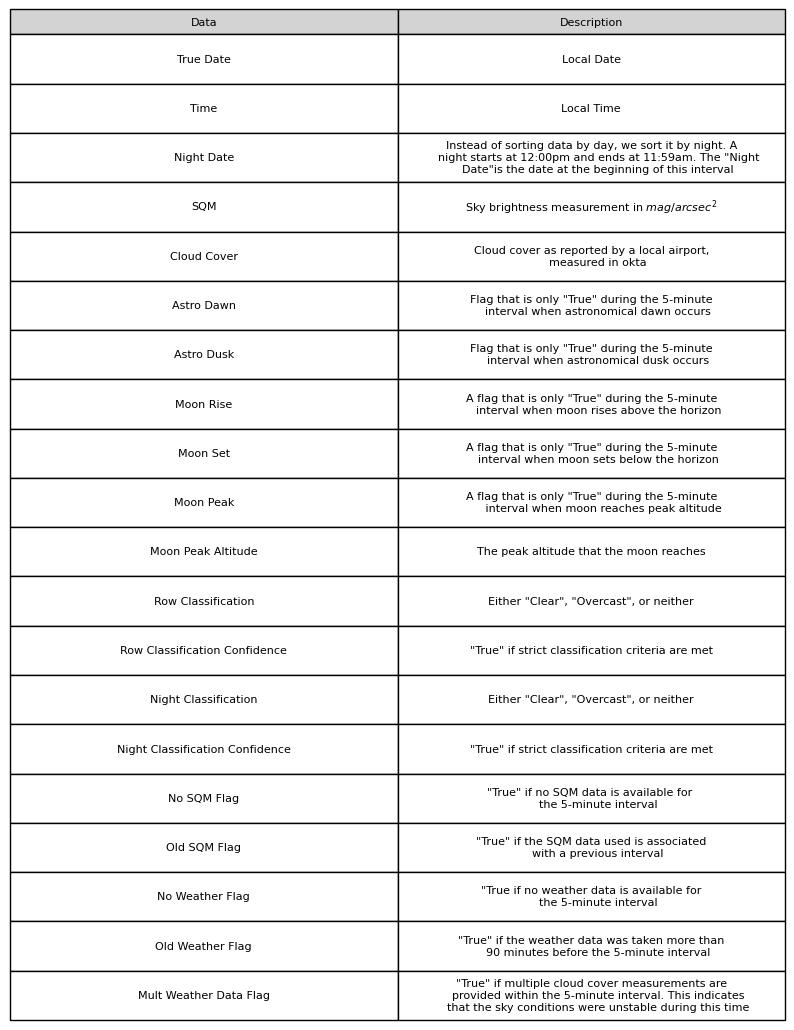

In [125]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline

# Define columns
columns = ['Data', 'Description']

# Create an empty DataFrame
summary_df = pd.DataFrame(columns=columns)

# Data for column 1
column1_data = [
    'True Date', 'Time',  'Night Date', 'SQM', 'Cloud Cover',
    'Astro Dawn', 'Astro Dusk',  'Moon Rise', 'Moon Set',
    'Moon Peak', 'Moon Peak Altitude', 'Row Classification',
    'Row Classification Confidence', 'Night Classification',
    'Night Classification Confidence', 'No SQM Flag', 'Old SQM Flag',
    'No Weather Flag', 'Old Weather Flag', 'Mult Weather Data Flag'
]

# Data for column 2
column2_data = [
    'Local Date', 
    'Local Time',
    '''Instead of sorting data by day, we sort it by night. A\n
    night starts at 12:00pm and ends at 11:59am. The "Night\n 
    Date"is the date at the beginning of this interval''',
    'Sky brightness measurement in $mag/arcsec^2$',
    '''Cloud cover as reported by a local airport,\n 
    measured in okta''',
    '''Flag that is only "True" during the 5-minute\n 
    interval when astronomical dawn occurs''',
    '''Flag that is only "True" during the 5-minute\n 
    interval when astronomical dusk occurs''',
    '''A flag that is only "True" during the 5-minute\n 
    interval when moon rises above the horizon''',
    '''A flag that is only "True" during the 5-minute\n 
    interval when moon sets below the horizon''',
    '''A flag that is only "True" during the 5-minute\n 
       interval when moon reaches peak altitude''',
    'The peak altitude that the moon reaches',
    'Either "Clear", "Overcast", or neither',
    '"True" if strict classification criteria are met',
    'Either "Clear", "Overcast", or neither',
    '"True" if strict classification criteria are met',
    '''"True" if no SQM data is available for \n
    the 5-minute interval''',
    '''"True" if the SQM data used is associated\n
    with a previous interval''',
    '''"True if no weather data is available for\n
    the 5-minute interval''',
    '''"True" if the weather data was taken more than\n
    90 minutes before the 5-minute interval''',
    '''"True" if multiple cloud cover measurements are\n
    provided within the 5-minute interval. This indicates\n
    that the sky conditions were unstable during this time'''
]

# Populate DataFrame
summary_df['Data'] = column1_data
summary_df['Description'] = column2_data

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc='center', cellLoc='center', colColours=['lightgray']*len(summary_df.columns))

table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size

# Adjust layout
# table.auto_set_column_width(col=list(range(len(summary_df.columns))))  # Auto adjust column width
# Adjust layout
# Manually set column widths
# table.auto_set_column_width(col=list(range(len(summary_df.columns))))  # Auto adjust column width
# table.set_column_width(col=0, width=0.15)  # Adjust width of the first column
# table.set_column_width(col=1, width=0.7)  # Adjust width of the second column

table.set_fontsize(8)  # Adjust font size
table.scale(1, 1.5)  # Adjust scaling for better readability

# Adjust row heights for multiline text
for i in range(len(summary_df)):
    for j in range(len(summary_df.columns)):
        cell = table.get_celld()[(i + 1, j)]
        cell.set_height(0.08)  # Increase row height
        

# Adjust padding between lines of text within cells
for cell in table._cells.values():
    cell._text.set_linespacing(0.5)  # Adjust linespacing within cells

save_path = os.path.join("Summary Tables", 'desc_table.png')
# Save as PNG with higher DPI
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=600)  # Adjusting vertical padding only
plt.show()


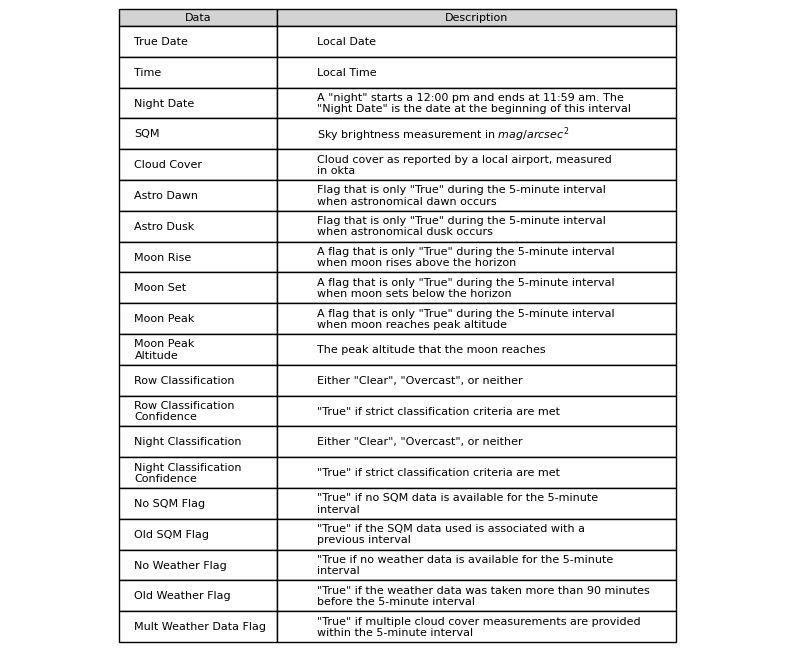

In [154]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline

# Define columns
columns = ['Data', 'Description']

# Create an empty DataFrame
desc_df = pd.DataFrame(columns=columns)

# Data for column 1
column1_data = [
    'True Date', 'Time',  'Night Date', 'SQM', 'Cloud Cover',
    'Astro Dawn', 'Astro Dusk',  'Moon Rise', 'Moon Set',
    'Moon Peak', 'Moon Peak\nAltitude', 'Row Classification',
    'Row Classification\nConfidence', 'Night Classification',
    'Night Classification\nConfidence', 'No SQM Flag', 'Old SQM Flag',
    'No Weather Flag', 'Old Weather Flag', 'Mult Weather Data Flag'
]

# Data for column 2
column2_data = [
    'Local Date', 
    'Local Time',
    '''A "night" starts a 12:00 pm and ends at 11:59 am. The\n"Night Date" is the date at the beginning of this interval''',
    'Sky brightness measurement in $mag/arcsec^2$',
    '''Cloud cover as reported by a local airport, measured\nin okta''',
    '''Flag that is only "True" during the 5-minute interval\nwhen astronomical dawn occurs''',
    '''Flag that is only "True" during the 5-minute interval\nwhen astronomical dusk occurs''',
    '''A flag that is only "True" during the 5-minute interval\nwhen moon rises above the horizon''',
    '''A flag that is only "True" during the 5-minute interval\nwhen moon sets below the horizon''',
    '''A flag that is only "True" during the 5-minute interval\nwhen moon reaches peak altitude''',
    'The peak altitude that the moon reaches',
    'Either "Clear", "Overcast", or neither',
    '"True" if strict classification criteria are met',
    'Either "Clear", "Overcast", or neither',
    '"True" if strict classification criteria are met',
    '''"True" if no SQM data is available for the 5-minute\ninterval''',
    '''"True" if the SQM data used is associated with a\nprevious interval''',
    '''"True if no weather data is available for the 5-minute\ninterval''',
    '''"True" if the weather data was taken more than 90 minutes\nbefore the 5-minute interval''',
    '''"True" if multiple cloud cover measurements are provided\nwithin the 5-minute interval'''
]

# Populate DataFrame
desc_df['Data'] = column1_data
desc_df['Description'] = column2_data


# Plotting
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=desc_df.values, colLabels=desc_df.columns, loc='center', cellLoc='left', colColours=['lightgray']*len(desc_df.columns))

table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size

# Adjust layout
table.auto_set_column_width(col=list(range(len(desc_df.columns))))  # Auto adjust column width
# Manually set column widths
table.auto_set_column_width(col=[0])  # Auto adjust column width for the first column

# Adjust row heights for multiline text
for i in range(len(desc_df)):
    for j in range(len(desc_df.columns)):
        cell = table.get_celld()[(i + 1, j)]
        cell.set_height(0.05)  # Increase row height
        

# Adjust padding between lines of text within cells
for cell in table._cells.values():
    cell._text.set_linespacing(1.15)  # Adjust linespacing within cells
    

save_path = os.path.join("Summary Tables", 'desc_table.png')
# Save as PNG with higher DPI
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=600)  # Adjusting vertical padding only
plt.show()


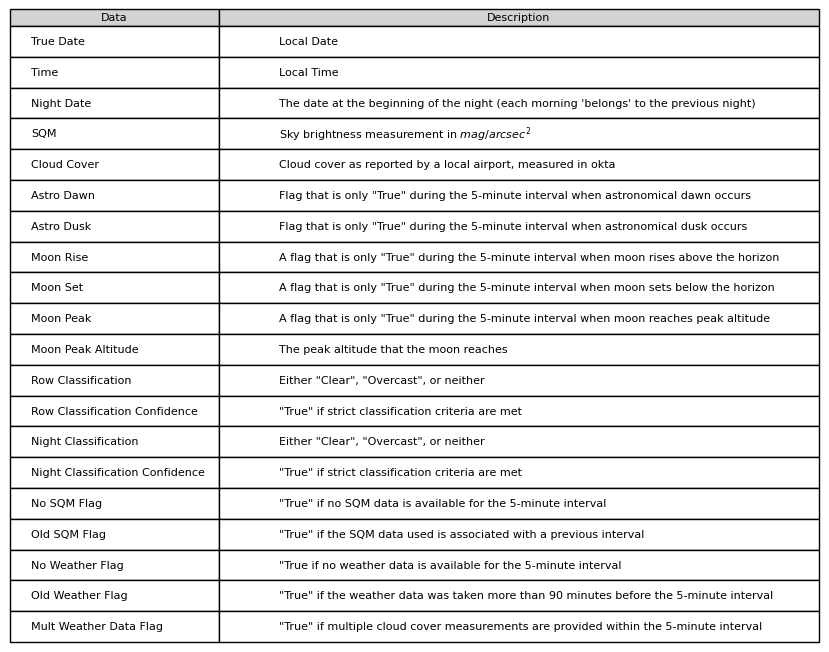

In [156]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline

# Define columns
columns = ['Data', 'Description']

# Create an empty DataFrame
desc_df = pd.DataFrame(columns=columns)

# Data for column 1
column1_data = [
    'True Date', 'Time',  'Night Date', 'SQM', 'Cloud Cover',
    'Astro Dawn', 'Astro Dusk',  'Moon Rise', 'Moon Set',
    'Moon Peak', 'Moon Peak Altitude', 'Row Classification',
    'Row Classification Confidence', 'Night Classification',
    'Night Classification Confidence', 'No SQM Flag', 'Old SQM Flag',
    'No Weather Flag', 'Old Weather Flag', 'Mult Weather Data Flag'
]

# Data for column 2
column2_data = [
    'Local Date', 
    'Local Time',
    '''The date at the beginning of the night (each morning 'belongs' to the previous night)''',
    'Sky brightness measurement in $mag/arcsec^2$',
    '''Cloud cover as reported by a local airport, measured in okta''',
    '''Flag that is only "True" during the 5-minute interval when astronomical dawn occurs''',
    '''Flag that is only "True" during the 5-minute interval when astronomical dusk occurs''',
    '''A flag that is only "True" during the 5-minute interval when moon rises above the horizon''',
    '''A flag that is only "True" during the 5-minute interval when moon sets below the horizon''',
    '''A flag that is only "True" during the 5-minute interval when moon reaches peak altitude''',
    'The peak altitude that the moon reaches',
    'Either "Clear", "Overcast", or neither',
    '"True" if strict classification criteria are met',
    'Either "Clear", "Overcast", or neither',
    '"True" if strict classification criteria are met',
    '''"True" if no SQM data is available for the 5-minute interval''',
    '''"True" if the SQM data used is associated with a previous interval''',
    '''"True if no weather data is available for the 5-minute interval''',
    '''"True" if the weather data was taken more than 90 minutes before the 5-minute interval''',
    '''"True" if multiple cloud cover measurements are provided within the 5-minute interval'''
]

# Populate DataFrame
desc_df['Data'] = column1_data
desc_df['Description'] = column2_data


# Plotting
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=desc_df.values, colLabels=desc_df.columns, loc='center', cellLoc='left', colColours=['lightgray']*len(desc_df.columns))

table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size

# Adjust layout
table.auto_set_column_width(col=list(range(len(desc_df.columns))))  # Auto adjust column width
# Manually set column widths
table.auto_set_column_width(col=[0])  # Auto adjust column width for the first column

# Adjust row heights for multiline text
for i in range(len(desc_df)):
    for j in range(len(desc_df.columns)):
        cell = table.get_celld()[(i + 1, j)]
        cell.set_height(0.05)  # Increase row height
        

# Adjust padding between lines of text within cells
for cell in table._cells.values():
    cell._text.set_linespacing(1.15)  # Adjust linespacing within cells
    

save_path = os.path.join("Summary Tables", 'desc_table.png')
# Save as PNG with higher DPI
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1, dpi=600)  # Adjusting vertical padding only
plt.show()


### END SUMMARY TABLE

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\djzak\AppData\Local\Temp\ipykernel_9976\2125362394.py:14: SyntaxWarning: invalid escape sequence '\s'
  'Clear $\sigma$',
C:\Users\djzak\AppData\Local\Temp\ipykernel_9976\2125362394.py:17: SyntaxWarning: invalid escape sequence '\s'
  'Overcast $\sigma$',
C:\Users\djzak\AppData\Local\Temp\ipykernel_9976\2125362394.py:20: SyntaxWarning: invalid escape sequence '\s'
  'Diff $\sigma$',


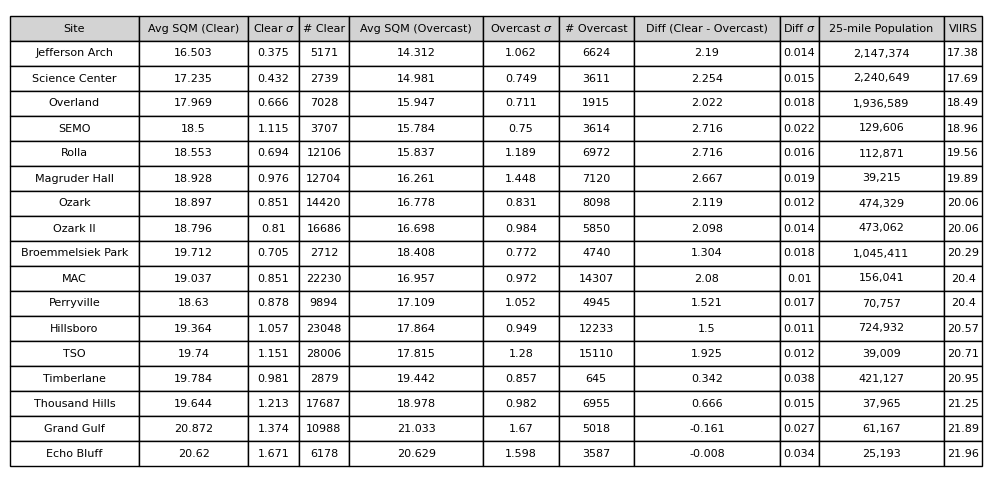

In [127]:
data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline


high_conf = True



# Define columns
columns = [
    'Site', 
    'Avg SQM (Clear)', 
    'Clear $\sigma$', 
    '# Clear', 
    'Avg SQM (Overcast)', 
    'Overcast $\sigma$', 
    '# Overcast', 
    'Diff (Clear - Overcast)', 
    'Diff $\sigma$', 
    '25-mile Population',
    'VIIRS'
    ]



# Create an empty DataFrame
summary_df = pd.DataFrame(columns=columns)

# Displaying DataFrame
# print(df)

 

for location in my_locs:  
  
    # Filter only CSV files containing the desired location in their filename
    location_for_dir = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_for_dir in file]


    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)

        
        df = pd.read_csv(df_path, low_memory=False)



        if high_conf: 
            clear_sqms = df[(df["Row Classification"] == 'Clear') & (df["Row Classification Confidence"])].dropna(subset=["SQM"])["SQM"].tolist()
            overcast_sqms = df[(df["Row Classification"] == 'Overcast') & (df["Row Classification Confidence"])].dropna(subset=["SQM"])["SQM"].tolist()
        else: 
            clear_sqms = df[(df["Row Classification"] == 'Clear')].dropna(subset=["SQM"])["SQM"].tolist()
            overcast_sqms = df[(df["Row Classification"] == 'Overcast')].dropna(subset=["SQM"])["SQM"].tolist()
        
        num_clear = len(clear_sqms)
        clear_avg = np.mean(clear_sqms)
        clear_stdev = np.std(clear_sqms)

        num_overcast = len(overcast_sqms)
        overcast_avg = np.mean(overcast_sqms)
        overcast_stdev = np.std(overcast_sqms)


        diff = clear_avg - overcast_avg
        diff_stdev = np.sqrt((clear_stdev ** 2 / num_clear) + (overcast_stdev ** 2 / num_overcast)) # see Devore Stats book for engineering + sci CH 9
        
        
        # format site appropriately
        site_str = location.replace('_',' ').split()
        capitalized_site = []

        for word in site_str:
            if len(word) > 0:
                capitalized_word = word[0].upper() + word[1:]
                capitalized_site.append(capitalized_word)
                capitalized_site_str = ' '.join(capitalized_site)

        # format population
        # Set the locale to the system default
        locale.setlocale(locale.LC_ALL, '')
        formatted_pop = locale.format_string("%d", int(loc_dict[location][5]), grouping=True)

        new_data = {
            'Site': capitalized_site_str,
            'Avg SQM (Clear)': clear_avg,
            'Clear $\\sigma$': clear_stdev ,
            '# Clear': num_clear,
            'Avg SQM (Overcast)': overcast_avg,
            'Overcast $\\sigma$': overcast_stdev,
            '# Overcast': num_overcast,
            'Diff (Clear - Overcast)': diff,
            'Diff $\\sigma$': diff_stdev,
            '25-mile Population': formatted_pop, 
            'VIIRS': loc_dict[location][0]
            
            }
                        

        row_index = len(df)  # Assuming you want to add the new row at the end of the DataFrame
        summary_df.loc[row_index] = new_data
        


# Round the values to two decimal points
summary_df = summary_df.round(3)
# Sort DataFrame by VIIRS value
summary_df = summary_df.sort_values(by='VIIRS', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc='center', cellLoc='center', colColours=['lightgray']*len(summary_df.columns))

table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size

# Adjust layout
table.auto_set_column_width(col=list(range(len(summary_df.columns))))  # Auto adjust column width
table.set_fontsize(8)  # Adjust font size
table.scale(1, 1.5)  # Adjust scaling for better readability

save_path = os.path.join("Summary Tables", 'results_table.png')
# Save as PNG with higher DPI
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()


In [128]:
summary_df['25-mile Population']

148608    2,147,374
133920    2,240,649
86112     1,936,589
47520       129,606
118944      112,871
377280       39,215
134784      474,329
168192      473,062
58320     1,045,411
238464      156,041
198720       70,757
253440      724,932
424512       39,009
33408       421,127
245088       37,965
161568       61,167
78480        25,193
Name: 25-mile Population, dtype: object

In [129]:
print("Clear Sky Results:")
print(f"Number of clear sky measurements: {num_clear}")
print(f"Average clear sky measurement: {clear_avg:.2f}")
print(f"Standard deviation of clear sky measurements: {clear_stdev:.2f}\n")

print("Overcast Sky Results:")
print(f"Number of overcast sky measurements: {num_overcast}")
print(f"Average overcast sky measurement: {overcast_avg:.2f}")
print(f"Standard deviation of overcast sky measurements: {overcast_stdev:.2f}\n")

print("Difference between Clear and Overcast Sky Results:")
print(f"Difference in averages: {diff:.2f}")
print(f"Standard deviation of the difference: {diff_stdev:.2f}")


Clear Sky Results:
Number of clear sky measurements: 2712
Average clear sky measurement: 19.71
Standard deviation of clear sky measurements: 0.70

Overcast Sky Results:
Number of overcast sky measurements: 4740
Average overcast sky measurement: 18.41
Standard deviation of overcast sky measurements: 0.77

Difference between Clear and Overcast Sky Results:
Difference in averages: 1.30
Standard deviation of the difference: 0.02


In [130]:
summary_df

,Site,Avg SQM (Clear),Clear $\sigma$,# Clear,Avg SQM (Overcast),Overcast $\sigma$,# Overcast,Diff (Clear - Overcast),Diff $\sigma$,25-mile Population,VIIRS
148608,Jefferson Arch,16.503,0.375,5171,14.312,1.062,6624,2.190,0.014,"2,147,374",17.38
133920,Science Center,17.235,0.432,2739,14.981,0.749,3611,2.254,0.015,"2,240,649",17.69
86112,Overland,17.969,0.666,7028,15.947,0.711,1915,2.022,0.018,"1,936,589",18.49
47520,SEMO,18.500,1.115,3707,15.784,0.750,3614,2.716,0.022,"129,606",18.96
118944,Rolla,18.553,0.694,12106,15.837,1.189,6972,2.716,0.016,"112,871",19.56
377280,Magruder Hall,18.928,0.976,12704,16.261,1.448,7120,2.667,0.019,"39,215",19.89
134784,Ozark,18.897,0.851,14420,16.778,0.831,8098,2.119,0.012,"474,329",20.06
168192,Ozark II,18.796,0.810,16686,16.698,0.984,5850,2.098,0.014,"473,062",20.06
58320,Broemmelsiek Park,19.712,0.705,2712,18.408,0.772,4740,1.304,0.018,"1,045,411",20.29
238464,MAC,19.037,0.851,22230,16.957,0.972,14307,2.080,0.010,"156,041",20.40


In [131]:

summary_df['25-mile Population'] 

148608    2,147,374
133920    2,240,649
86112     1,936,589
47520       129,606
118944      112,871
377280       39,215
134784      474,329
168192      473,062
58320     1,045,411
238464      156,041
198720       70,757
253440      724,932
424512       39,009
33408       421,127
245088       37,965
161568       61,167
78480        25,193
Name: 25-mile Population, dtype: object

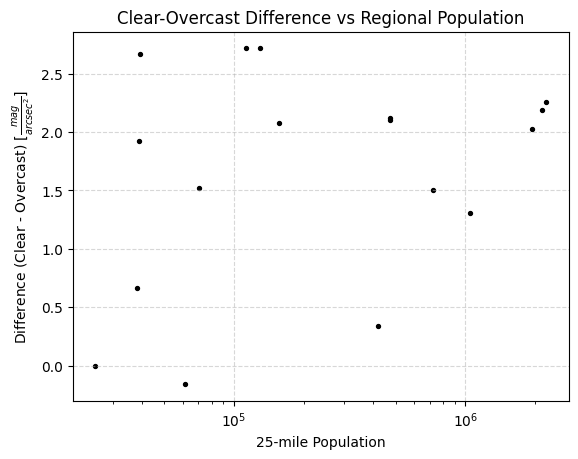

In [132]:
import matplotlib.pyplot as plt

# Convert '10-mile Population' to numeric if it's not already
# pop10 = summary_df['10-mile Population'].apply(lambda x: int(x.replace(',', '')))
pop25 = summary_df['25-mile Population'].apply(lambda x: int(x.replace(',', '')))


# plt.scatter(pop10, summary_df['Diff (Clear - Overcast)'], color="black", s=8)
# plt.xlabel('10-mile Population')
# plt.ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
# plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
# plt.title('Clear-Overcast Difference vs Regional Population')
# plt.show()


plt.scatter(pop25, summary_df['Diff (Clear - Overcast)'], color="black", s=8)
plt.xlabel('25-mile Population')
plt.ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
plt.title('Clear-Overcast Difference vs Regional Population')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xscale('log')


# plt.scatter(summary_df['10-mile Population'], summary_df['Difference (Clear - Overcast)'], color="black", s=8)
# plt.xlabel('10-mile Population')
# plt.ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
# plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
# plt.title('Clear-Overcast Difference vs Regional Population')
# plt.show()
save_path = os.path.join("Summary Tables", 'diff_vs_pop.png')
# Save as PNG with higher DPI
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()


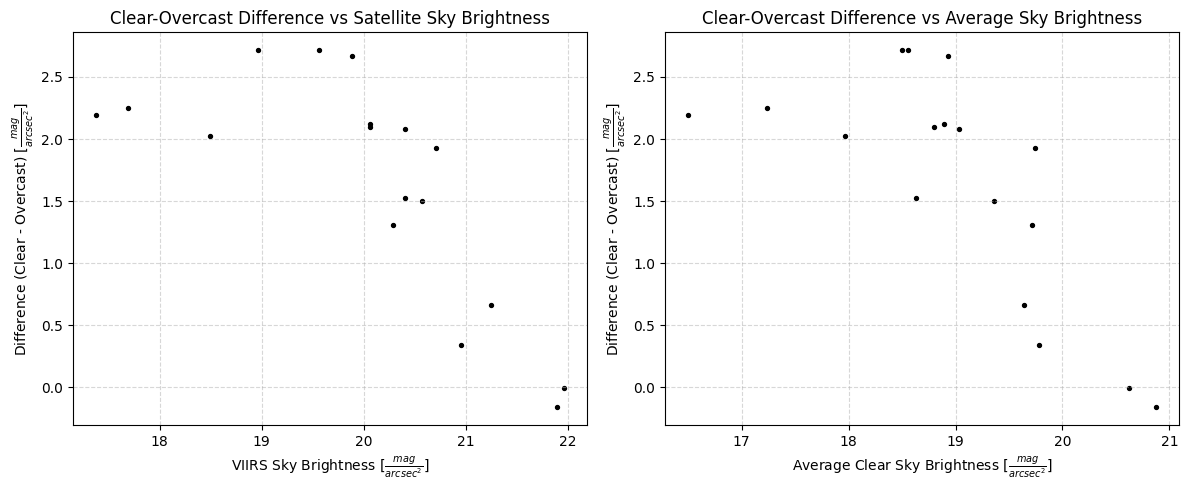

In [133]:
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
axs[0].scatter(summary_df['VIIRS'], summary_df['Diff (Clear - Overcast)'], color="black", s=8)
axs[0].set_xlabel(r'VIIRS Sky Brightness [$\frac{mag}{arcsec^2}$]')
axs[0].set_ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
axs[0].ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
axs[0].set_title('Clear-Overcast Difference vs Satellite Sky Brightness')
axs[0].grid(True, linestyle='--', alpha=0.5)



# Second subplot
axs[1].scatter(summary_df["Avg SQM (Clear)"], summary_df['Diff (Clear - Overcast)'], color="black", s=8)
axs[1].set_xlabel(r'Average Clear Sky Brightness [$\frac{mag}{arcsec^2}$]')
axs[1].set_ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
axs[1].ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
axs[1].set_title('Clear-Overcast Difference vs Average Sky Brightness')
axs[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()


save_path = os.path.join("Summary Tables", 'diff_vs_brightness.png')
# Save as PNG with higher DPI
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()



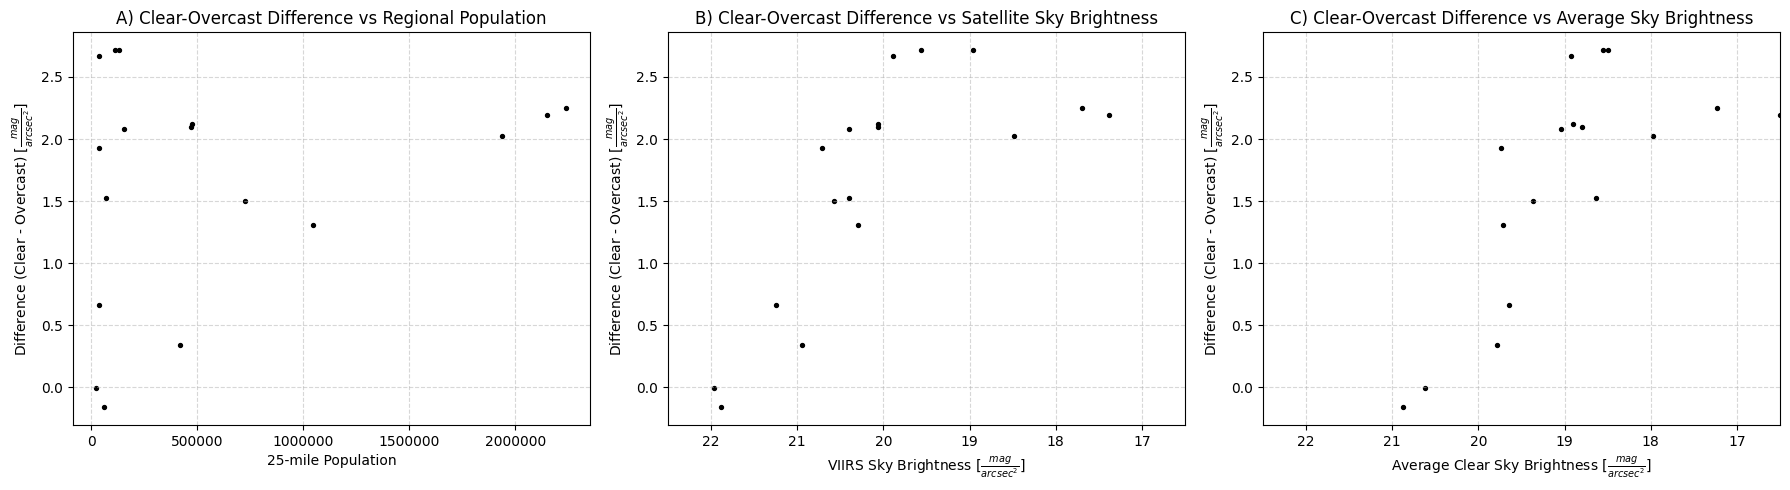

In [134]:
import matplotlib.pyplot as plt
import os

# Convert '10-mile Population' to numeric if it's not already
# pop10 = summary_df['10-mile Population'].apply(lambda x: int(x.replace(',', '')))
pop25 = summary_df['25-mile Population'].apply(lambda x: int(x.replace(',', '')))

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# First subplot
axs[0].scatter(pop25, summary_df['Diff (Clear - Overcast)'], color="black", s=8)
axs[0].set_xlabel('25-mile Population')
axs[0].set_ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
axs[0].ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
axs[0].set_title('A) Clear-Overcast Difference vs Regional Population')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Second subplot
axs[1].scatter(summary_df['VIIRS'], summary_df['Diff (Clear - Overcast)'], color="black", s=8)
axs[1].set_xlabel(r'VIIRS Sky Brightness [$\frac{mag}{arcsec^2}$]')
axs[1].set_ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
axs[1].ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
axs[1].set_title('B) Clear-Overcast Difference vs Satellite Sky Brightness')
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].set_xlim(22.5,16.5)

# Third subplot
axs[2].scatter(summary_df["Avg SQM (Clear)"], summary_df['Diff (Clear - Overcast)'], color="black", s=8)
axs[2].set_xlabel(r'Average Clear Sky Brightness [$\frac{mag}{arcsec^2}$]')
axs[2].set_ylabel(r'Difference (Clear - Overcast) [$\frac{mag}{arcsec^2}$]')
axs[2].ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
axs[2].set_title('C) Clear-Overcast Difference vs Average Sky Brightness')
axs[2].grid(True, linestyle='--', alpha=0.5)
axs[2].set_xlim(22.5,16.5)

# Adjust layout
plt.tight_layout()

# Save as PNG with higher DPI
save_path = os.path.join("Summary Tables", 'diff_plots.png')
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.05, dpi=600)

plt.show()
